In [1]:
%pylab inline
import os, sys
sys.path.append('..')
from util.filters import filter_2d
from util.image import convert_to_grayscale
def classify(im):
    gray = convert_to_grayscale(im/255.)
    Kx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    Gx = filter_2d(gray, Kx)
    Gy = filter_2d(gray, Ky)

    #Compute Gradient Magnitude and Direction:
    G_magnitude = np.sqrt(Gx**2+Gy**2)
    G_direction = np.arctan2(Gy, Gx)
    edges = G_magnitude > 0.95
    if (std(edges) < 7)
        return 'ball'
    y_coords,x_coords = np.where(edges)
    y_coords_flipped = edges.shape[0] - y_coords

    phi_bins = 64
    theta_bins = 64
    accumulator = np.zeros((phi_bins, theta_bins))
    rho_min = -edges.shape[0]
    rho_max = edges.shape[1]
    theta_min = 0
    theta_max = np.pi
    #Compute the rho and theta values for the grids in our accumulator:

    rhos = np.linspace(rho_min, rho_max, accumulator.shape[0])
    thetas = np.linspace(theta_min, theta_max, accumulator.shape[1])
    for i in range(len(x_coords)):
        #Grab a single point
        x = x_coords[i]
        y = y_coords_flipped[i]

        #Actually do transform!
        curve_rhos = x*np.cos(thetas)+y*np.sin(thetas)

        for j in range(len(thetas)):
            #Make sure that the part of the curve falls within our accumulator
            if np.min(abs(curve_rhos[j]-rhos)) <= 1.0:
                #Find the cell our curve goes through:
                rho_index = argmin(abs(curve_rhos[j]-rhos))
                accumulator[rho_index, j] += 1
    max_value = np.max(accumulator)
    #fi = imshow(edges)
    print (im+max_value)
    if max_value<60:
        return 'ball'
    elif max_value>160:
        return 'brick'
    else:
        return 'cylinder'

SyntaxError: invalid syntax (<ipython-input-1-cc2d2a132331>, line 22)

In [ ]:
## ------------------------- ##
##
## evaluate.py
## Basic image processing utilties.
## 
##
## ------------------------- ##

import numpy as np
import glob
from easydict import EasyDict
from matplotlib.pyplot import imread
import time

#Import student's method:
from sample_student import classify

program_start = time.time()

dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
weights = [0.5, 0.2, 0.2, 0.1]
classes = ['ball', 'brick', 'cylinder']
data_path = '../data' #Assuming data is one directory up. 

dataset_weights = {}
for i in range(len(dataset_names)):
    dataset_weights[dataset_names[i]] = weights[i]

#Store data performance data in a nested easydict:
performance = EasyDict()
total_time = 0

#Iterate through images:
for dataset_name in dataset_names:
    performance[dataset_name] = EasyDict()
    performance[dataset_name]['overall'] = np.array([0, 0]) #overall Correct/incorrect
    
    for image_class in classes:
        performance[dataset_name][image_class] = np.array([0, 0])
        image_paths = glob.glob(data_path + '/' 
                                + dataset_name + '/' 
                                + image_class + '/*.jpg')
        
        for image_path in image_paths:
            im = imread(image_path)
            print (image_path)
            start_time = time.time()
            prediction = classify(im)
            end_time = time.time()
            total_time += (end_time - start_time)
            
            if image_class == prediction:
                performance[dataset_name][image_class][0] += 1
            else:
                performance[dataset_name][image_class][1] += 1
                
        #Tally overall performance for class
        performance[dataset_name]['overall'] = performance[dataset_name]['overall'] \
                                               + performance[dataset_name][image_class]


#Print out errors: 
print('Fraction of Correct Predictions: ')
overall_accuracy = 0
for dataset_name in dataset_names:
    total_correct, total_incorrect = performance[dataset_name]['overall']
    total = total_correct + total_incorrect
    accuracy = np.round(float(total_correct)/total, 4)
    overall_accuracy += accuracy * dataset_weights[dataset_name]
    performance[dataset_name]['accuracy'] = accuracy
    print(dataset_name + ': ' + \
           '(' + str(total_correct) + '/' + str(total) + ' = ' + \
           str(accuracy) + ')')
    
    for image_class in classes:
        print('   ' + image_class + ': '
              + str(performance[dataset_name][image_class][0])
              + '/'
              + str(np.sum(performance[dataset_name][image_class])))

overall_accuracy = np.round(overall_accuracy, 2)
score = 0

if overall_accuracy >= 0.6:
   score = 10
elif overall_accuracy >= 0.55:
   score = 9
elif overall_accuracy >= 0.5:
   score = 8
elif overall_accuracy >= 0.45:
   score = 7
elif overall_accuracy >= 0.4:
   score = 6
elif overall_accuracy >= 0.35:
   score = 5
elif overall_accuracy >= 0:
   score = 4


print("\nOverall Accuracy = ", overall_accuracy)
print("Score = ", score)

program_end = time.time()
complete_time = program_end - program_start
total_time =  round(total_time, 5)
complete_time = round(complete_time, 5)

print("Classification time (seconds): = ", total_time)
print("Program completetion time (seconds): = ", complete_time)


In [ ]:
import numpy as np
import glob
from matplotlib.pyplot import imread
import os, sys
sys.path.append('..')
from util.filters import filter_2d
from util.image import convert_to_grayscale

Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

filenames = glob.glob('../data/easy/cylinder/*.jpg')
images = []
for filename in filenames:
    im = imread(filename)
    images.append(im)
gray_images=[]
for image in images:
    gray_images.append(convert_to_grayscale(image/255.))
Gx=[];Gy=[]
for g in gray_images:
    Gx.append(filter_2d(g,Kx))
    Gy.append(filter_2d(g,Ky))
#print(Gx[0])
G = []
#G = np.array([])
angles = []
for i in range(len(gray_images)):
    G.append(np.sqrt(Gx[i]**2 + Gy[i]**2))
    angles.append(np.arctan2(Gy[i], Gx[i]))
G_np = np.array(G)
#angles = np.array(angles)
edge_angles = []
for i in range(len(angles)):
    edge_angles.append(angles[i][G_np[i]>0.95])
print (edge_angles[0])

std_dev = []
#imshow(edge_angles[0])
for i in range(len(edge_angles)):
    a = np.histogram(edge_angles[i],50)
    std_dev.append(std(a[0]))
print (std_dev)
hist(std_dev)

edge_angles
    

In [ ]:
a = np.histogram(edge_angles[0],50)

In [ ]:
std(a[0])

In [ ]:
std_dev

Populating the interactive namespace from numpy and matplotlib


C:\Users\nvankay1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


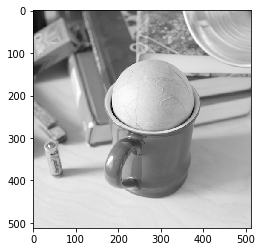

In [11]:
%pylab inline
import os, sys
sys.path.append('..')

from util.filters import filter_2d
from util.image import convert_to_grayscale

im = imread('../data/hard/ball/ball_1.jpg')
gray = convert_to_grayscale(im/255.)
imshow(gray,cmap='gray')